# Лабораторная работа 4_1

In [1]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import pylab as plt
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
%config IPCompleter.greedy=True

### 1.	Рассмотреть пример telecom_churn.csv (тетрадь KNN&DTree). В примере удалены 4 столбца, вам необходимо удалить только 2 признака (штат, № тел) и оставить два бинарных признака (yes, no), переведя их в 0 и 1 соответственно.

In [3]:
df = pd.read_csv('telecom_churn.csv')

In [4]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
df.drop(['state', 'phone number'], axis=1, inplace = True)

In [6]:
df['international plan'] = df['international plan'].map({'yes': 0 , 'no': 1})

In [7]:
df['voice mail plan'] = df['voice mail plan'].map({'yes': 0 , 'no': 1})

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
account length            3333 non-null int64
area code                 3333 non-null int64
international plan        3333 non-null int64
voice mail plan           3333 non-null int64
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64
customer service calls    3333 non-null int64
churn                     3333 non-null bool
dtyp

In [9]:
y = df['churn'].astype('int')

In [10]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: churn, dtype: int32

In [11]:
X = df.drop('churn', axis=1)

In [12]:
X.shape, y.shape

((3333, 18), (3333,))

In [13]:
from sklearn.model_selection import train_test_split, StratifiedKFold

Выделим 70% выборки (X_train, y_train) под обучение и 30% будут отложенной выборкой (X_holdout, y_holdout). отложенная выборка никак не будет участвовать в настройке параметров моделей, на ней мы в конце, после этой настройки, оценим качество полученной модели

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                          random_state=42)

In [15]:
X_train.shape, X_test.shape

((2333, 18), (1000, 18))

Обучим 2 модели – дерево решений и kNN, пока не знаем, какие параметры хороши, поэтому наугад: глубину дерева берем 5, число ближайших соседей – 10

In [16]:
import sklearn
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5, random_state=17)
sklearn.__version__

'0.21.3'

In [17]:
%%time
clf.fit(X_train, y_train)

Wall time: 16 ms


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=17, splitter='best')

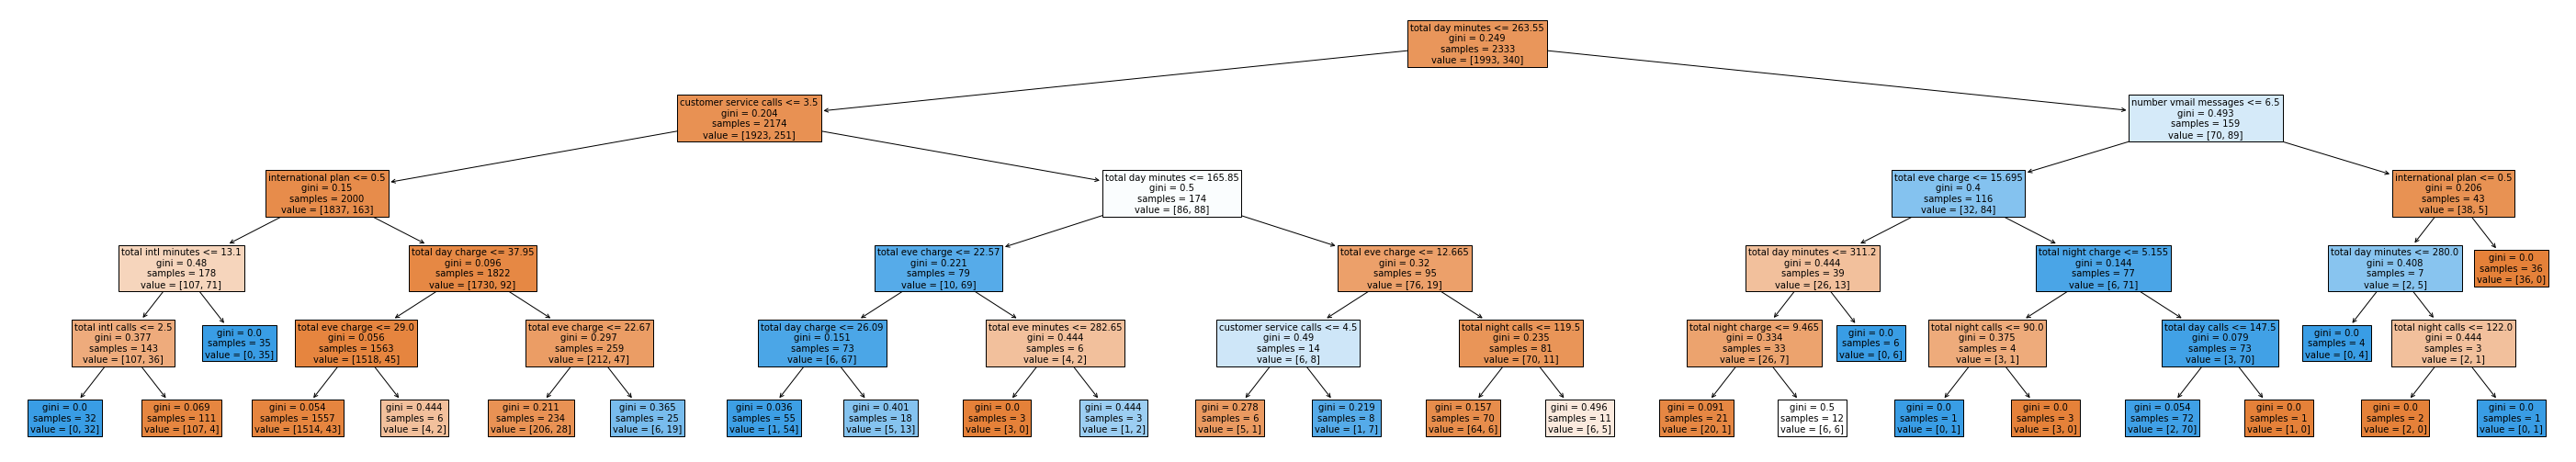

In [18]:
#единственный возможный способ, который я нашел за все время, который выводит график. graphviz и pydot не работают
plt.figure(figsize=(50, 9))
tree.plot_tree(clf, fontsize=10, feature_names=list(X), filled=True)
plt.show()
#сохранить можно вручную

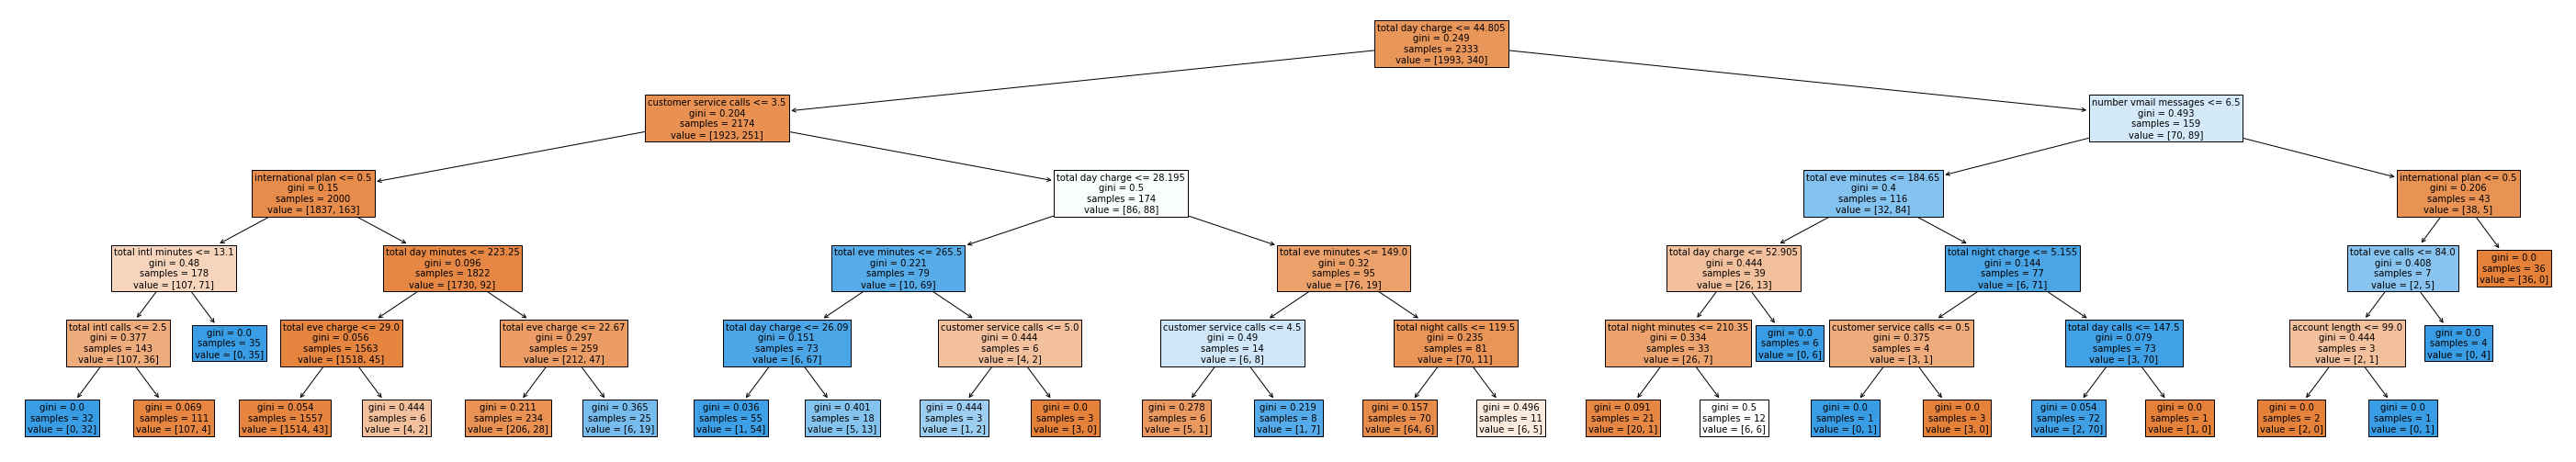

In [19]:
from PIL import Image
clftree = Image.open('clf.png')
clftree

In [20]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors=10)

In [21]:
%%time
knn.fit(X_train, y_train)

Wall time: 6.99 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

### 3.	Вывести качество прогнозов для обоих методов

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
tree_pred = clf.predict(X_test)
accuracy_score(y_test, tree_pred)

0.935

In [24]:
knn_pred = knn.predict(X_test)
accuracy_score(y_test, knn_pred)

0.876

### 4.	Вывести лучшее сочетание параметров и соответствующие среднии доля правильных ответов для обоих методов на кросвалидации

###### Для дерева

In [25]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [26]:
tree_params = {'max_depth': range(1,11),
               'max_features': range(4,19)}
               

In [27]:
tree_grid = GridSearchCV(clf, tree_params,
                         cv=5, n_jobs=-1,
                        verbose=True)

In [28]:
tree_grid.fit(X_train, y_train) 

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:    7.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=5,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=17,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': range(1, 11),
                         'max_features': range(4, 19)},
             pre_dispatch='2*n_jobs

In [29]:
tree_grid.best_params_ 

{'max_depth': 5, 'max_features': 14}

In [30]:
tree_grid.best_score_  

0.9408486926703815

##### 5.	Вывести результаты качества прогнозов для отложенной выборки в обоих методах. (для дерева)

In [31]:
accuracy_score(y_test, tree_grid.predict(X_test))

0.937

###### Для соседей

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [34]:
knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', neighbors.KNeighborsClassifier(n_jobs=-1))])

In [35]:
knn_params = {'knn__n_neighbors': range(1, 10)}

In [36]:
knn_grid = GridSearchCV(knn_pipe, knn_params,
                         cv=5, n_jobs=-1,
                        verbose=True)

In [37]:
knn_grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  45 | elapsed:    0.7s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    1.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('knn',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=-1,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                                verbose=False

In [38]:
knn_grid.best_params_, knn_grid.best_score_

({'knn__n_neighbors': 3}, 0.8889841405915131)

##### 5.	Вывести результаты качества прогнозов для отложенной выборки в обоих методах. (для соседей)

In [39]:
accuracy_score(y_test, knn_grid.predict(X_test))

0.882

### 6.	Рассмотреть Деревья решений и метод ближайших соседей в задаче распознавания рукописных цифр MNIST

In [61]:
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [62]:
data = load_digits()
X, y = data.data, data.target

In [63]:
X[0,:].reshape([8,8])

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

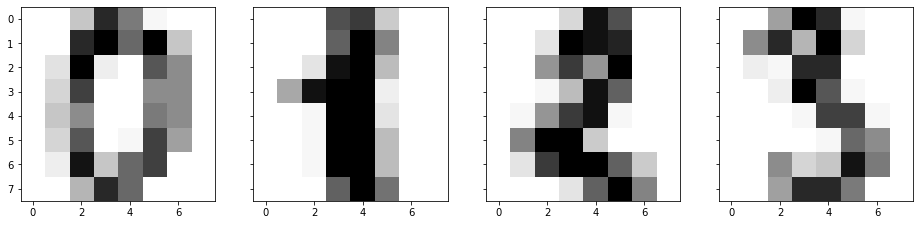

In [64]:
f, axes = plt.subplots(1, 4, sharey=True, figsize=(16,6))
for i in range(4):    
    axes[i].imshow(X[i,:].reshape([8,8]), cmap='Greys');

In [65]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3,
                                                          random_state=17)

In [66]:
tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn = KNeighborsClassifier(n_neighbors=10)

In [67]:
%%time
tree.fit(X_train, y_train)

Wall time: 11 ms


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=17, splitter='best')

In [68]:
%%time
knn.fit(X_train, y_train)

Wall time: 4 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

Сделаем прогнозы для отложенной выборки. Видим, что метод ближайших соседей справился намного лучше. Но это мы пока выбирали параметры наугад.

In [69]:
tree_pred = tree.predict(X_holdout)
knn_pred = knn.predict(X_holdout)
accuracy_score(y_holdout, knn_pred), accuracy_score(y_holdout, tree_pred)

(0.9740740740740741, 0.6666666666666666)

In [70]:
tree_params = {'max_depth': [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64],
               'max_features': [1, 2, 3, 5, 10, 20 ,30, 50, 64]}

In [71]:
tree_grid = GridSearchCV(tree, tree_params,
                         cv=5, n_jobs=-1,
                        verbose=True)

In [72]:
tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 495 out of 495 | elapsed:    0.7s finished
C:\Program Files (x86)\Soft data analyst\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=5,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=17,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64],
                         'max_features': [1, 2, 3, 5, 10, 20, 3

Лучшее сочетание параметров и соответствующая средняя доля правильных ответов на кросс-валидации:

In [73]:
tree_grid.best_params_, tree_grid.best_score_

({'max_depth': 20, 'max_features': 64}, 0.8440731901352426)

In [74]:
accuracy_score(y_holdout, tree_grid.predict(X_holdout))

0.8388888888888889

In [75]:
(cross_val_score(KNeighborsClassifier(n_neighbors=1), X_train, y_train, cv=5))

array([0.96875   , 0.99212598, 0.99206349, 0.99193548, 0.98785425])

In [76]:
np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=1), X_train, y_train, cv=5))

0.9865458422397149

In [77]:
knn = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
accuracy_score(y_holdout, knn.predict(X_holdout))

0.9833333333333333

### 7.	Провести обучение моделей методами DTree и kNN для выборок wine.txt и credit.csv.

### 8.	Повторить все процедуры с примера telecom_churn.csv

###### wine

In [78]:
df = pd.read_csv('wine.txt', sep='\t')
df.head()

,Input1,Input2,Input3,Input4,Input5,Input6,Input7,Input8,Input9,Input10,Input11,Input12,Input13,Desired1(3)
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [79]:
df['Desired1(3)'].value_counts()

2    71
0    59
1    48
Name: Desired1(3), dtype: int64

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Input1         178 non-null float64
Input2         178 non-null float64
Input3         178 non-null float64
Input4         178 non-null float64
Input5         178 non-null int64
Input6         178 non-null float64
Input7         178 non-null float64
Input8         178 non-null float64
Input9         178 non-null float64
Input10        178 non-null float64
Input11        178 non-null float64
Input12        178 non-null float64
Input13        178 non-null int64
Desired1(3)    178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [81]:
y = df['Desired1(3)']
X = df.drop('Desired1(3)', axis=1)

In [82]:
X.shape, y.shape

((178, 13), (178,))

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                          random_state=42)

In [84]:
from sklearn import tree

In [85]:
clf = tree.DecisionTreeClassifier(max_depth=3, random_state=42)

In [86]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

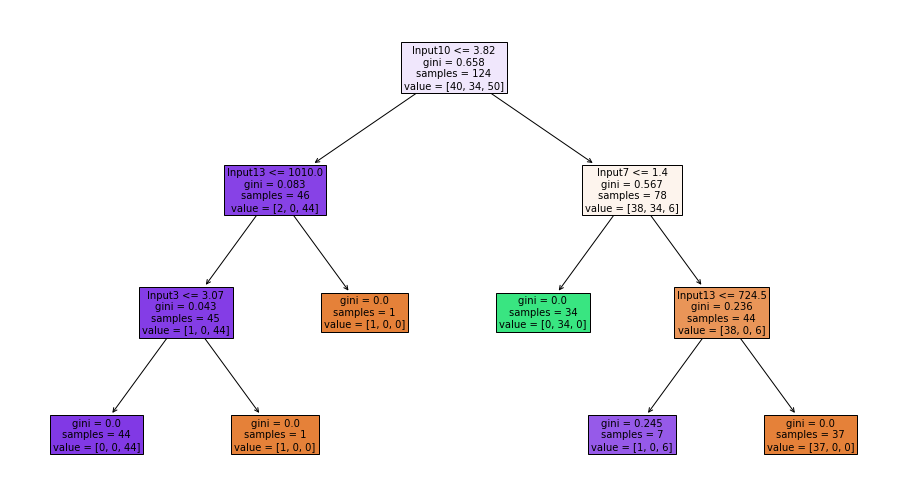

In [87]:
plt.figure(figsize=(16, 9))
tree.plot_tree(clf, fontsize=10, feature_names=list(X), filled=True)
plt.show()

In [88]:
knn = neighbors.KNeighborsClassifier(n_neighbors=1)

In [89]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [90]:
tree_pred = clf.predict(X_test)
accuracy_score(y_test, tree_pred)

0.9629629629629629

In [91]:
knn_pred = knn.predict(X_test)
accuracy_score(y_test, knn_pred)

0.7962962962962963

In [92]:
tree_params = {'max_depth': range(1,5),
               'max_features': range(1,13),
               'min_samples_leaf': range(1,5),
               'min_samples_split': range(2,5)
              }
               

tree_grid = GridSearchCV(clf, tree_params,
                         cv=5, n_jobs=-1,
                        verbose=True)

In [93]:
tree_grid.fit(X_train, y_train) 

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:    3.3s finished
C:\Program Files (x86)\Soft data analyst\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': range(1, 5), 'max_features': range(1, 13),
                         'min_samples_leaf': range(1, 5),
    

In [94]:
tree_grid.best_params_, tree_grid.best_score_

({'max_depth': 4,
  'max_features': 4,
  'min_samples_leaf': 1,
  'min_samples_split': 3},
 0.9516129032258065)

In [95]:
accuracy_score(y_test, tree_grid.predict(X_test))

0.8888888888888888

-----------------------------------------------------------

In [96]:
knn_params = {'knn__n_neighbors': range(1, 10)}

In [97]:
knn_grid = GridSearchCV(knn_pipe, knn_params,
                         cv=5, n_jobs=-1,
                        verbose=True)

In [98]:
knn_grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  45 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.7s finished
C:\Program Files (x86)\Soft data analyst\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('knn',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=-1,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                                verbose=False

In [99]:
knn_grid.best_params_, knn_grid.best_score_

({'knn__n_neighbors': 5}, 0.9516129032258065)

In [100]:
accuracy_score(y_test, knn_grid.predict(X_test))

0.9629629629629629

-----------------------------------------------

##### credit

In [101]:
df = pd.read_csv('Credit.csv', sep=';', encoding='cp1251')
df.head()

,кредит,клаcс,з_плата,возраст,кр_карта
0,1,2,2,2,1
1,0,2,1,2,0
2,0,4,1,1,1
3,1,2,2,2,0
4,1,3,2,1,0


In [102]:
df['кредит'].value_counts()

0    168
1    155
Name: кредит, dtype: int64

In [103]:
y = df['кредит']
X = df.drop('кредит', axis=1)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                          random_state=42)

In [105]:
clf = tree.DecisionTreeClassifier(max_depth=3, random_state=42)

In [106]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

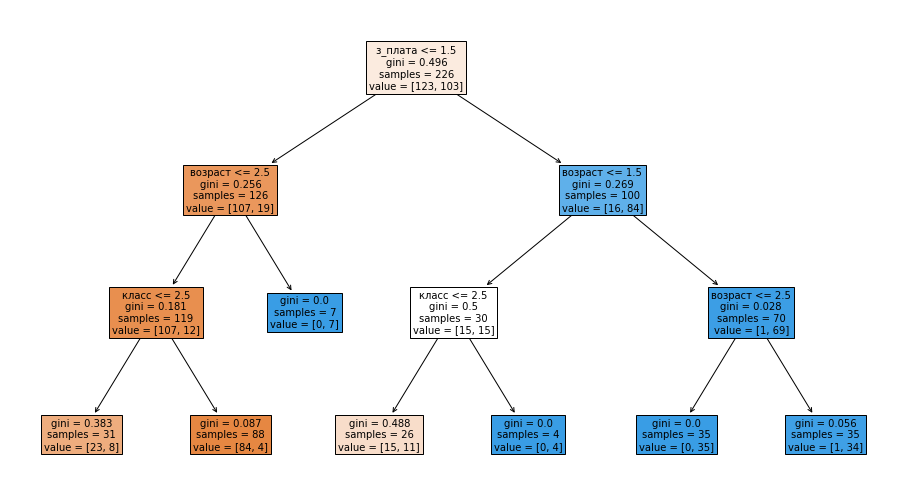

In [107]:
plt.figure(figsize=(16, 9))
tree.plot_tree(clf, fontsize=10, feature_names=list(X), filled=True)
plt.show()

In [108]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

In [109]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [110]:
tree_pred = clf.predict(X_test)
accuracy_score(y_test, tree_pred)

0.8865979381443299

In [111]:
knn_pred = knn.predict(X_test)
accuracy_score(y_test, knn_pred)

0.8350515463917526

In [112]:
tree_params = {'max_depth': range(1,7),
               'max_features': range(1,4),
               'min_samples_leaf': range(1,5),
               'min_samples_split': range(2,5)
              }
               

tree_grid = GridSearchCV(clf, tree_params,
                         cv=5, n_jobs=-1,
                        verbose=True)

In [113]:
tree_grid.fit(X_train, y_train) 

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    1.1s finished
C:\Program Files (x86)\Soft data analyst\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': range(1, 7), 'max_features': range(1, 4),
                         'min_samples_leaf': range(1, 5),
     

In [114]:
tree_grid.best_params_, tree_grid.best_score_

({'max_depth': 3,
  'max_features': 3,
  'min_samples_leaf': 1,
  'min_samples_split': 2},
 0.8938053097345132)

In [115]:
accuracy_score(y_test, tree_grid.predict(X_test))

0.8865979381443299

-----------------------------------------------------------

In [116]:
knn_params = {'knn__n_neighbors': range(1, 10)}

In [117]:
knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])

In [118]:
knn_grid = GridSearchCV(knn_pipe, knn_params,
                         cv=5, n_jobs=-1,
                        verbose=True)

In [119]:
knn_grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  45 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.6s finished
C:\Program Files (x86)\Soft data analyst\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('knn',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=-1,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                                verbose=False

In [120]:
knn_grid.best_params_, knn_grid.best_score_

({'knn__n_neighbors': 2}, 0.8628318584070797)

In [121]:
accuracy_score(y_test, knn_grid.predict(X_test))

0.845360824742268

# Лабораторная работа 4_2

In [122]:
df = pd.read_csv('Albuquerque Home Prices.txt', sep='\t')
df.head()

,PRICE,SQFT,AGE,FEATS,NE,CUST,COR,TAX
0,2050,2650,13,7,1,1,0,1639
1,2080,2600,-9999,4,1,1,0,1088
2,2150,2664,6,5,1,1,0,1193
3,2150,2921,3,6,1,1,0,1635
4,1999,2580,4,4,1,1,0,1732


In [123]:
df.loc[df['AGE'] == -9999, 'AGE'] = 0

In [124]:
y = df.PRICE
X =df.drop('PRICE', axis=1)

In [125]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((93, 7), (24, 7), (93,), (24,))

In [126]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

In [127]:
treer = DecisionTreeRegressor(random_state=42, max_depth = 3)
knr = KNeighborsRegressor(n_neighbors = 3)
linreg = LinearRegression()

In [128]:
treer.fit(X_train, y_train), knr.fit(X_train, y_train), linreg.fit(X_train, y_train)

(DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=42, splitter='best'),
 KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform'),
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False))

In [129]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [130]:
print(mean_squared_error(y_valid, treer.predict(X_valid)))
print(mean_absolute_error(y_valid, treer.predict(X_valid)))
print(r2_score(y_valid, treer.predict(X_valid)))

51725.85761888308
137.41511171497584
0.5547993648794312


In [131]:
print(mean_squared_error(y_valid, knr.predict(X_valid)))
print(mean_absolute_error(y_valid, knr.predict(X_valid)))
print(r2_score(y_valid, knr.predict(X_valid)))

43405.67129629629
132.0972222222222
0.6264105938788488


In [132]:
print(mean_squared_error(y_valid, linreg.predict(X_valid)))
print(mean_absolute_error(y_valid, linreg.predict(X_valid)))
print(r2_score(y_valid, linreg.predict(X_valid)))

72254.93211798945
151.36383264373305
0.3781071373134809
